In [681]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10
plt.style.use('ggplot')

In [682]:
# Read the data
df = pd.read_csv("Data_Negara_HELP.csv")

<h1>Understanding Data</h1>

<h2>Menampilkan contoh data, ukuran data, dan statistik data</h2>

In [683]:
# 5 data teratas
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [684]:
# Ukuran data
df.shape

(167, 10)

In [685]:
# Statistik Data
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h1>Exploratory Data Analysis</h1>

<h2>#Cek Missing Value</h2>

<AxesSubplot:>

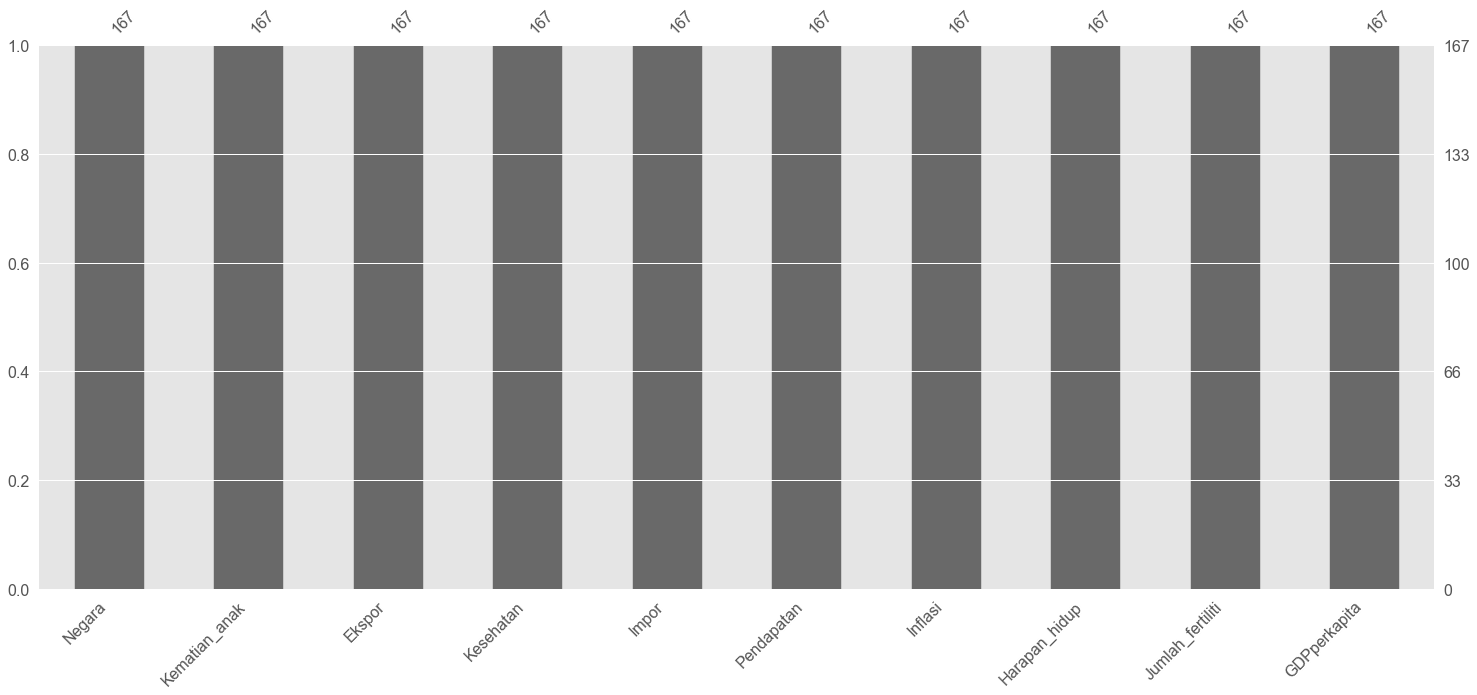

In [686]:
import missingno as msno
msno.bar(df)

<h2>#Cek Outliers</h2>

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

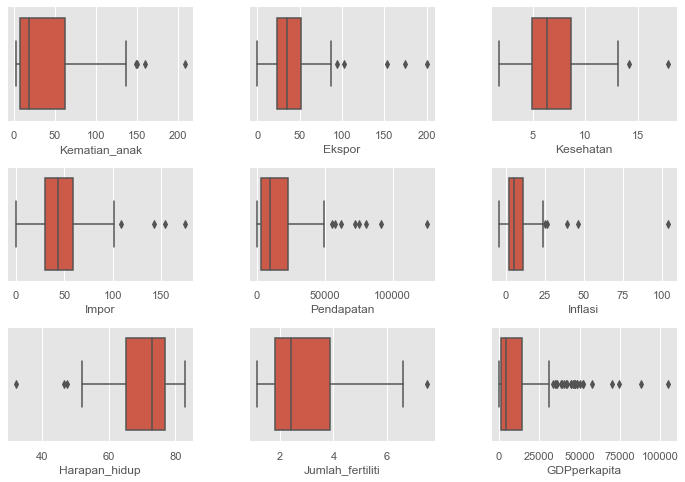

In [687]:
# boxplot untuk melihat berapa banyak outliers pada masing2 variabel

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df.drop(columns='Negara').columns)), df.drop(columns='Negara').columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.boxplot(df[columns])

<h2>#Relationship Analysis</h2>

=> Univariate Analysis

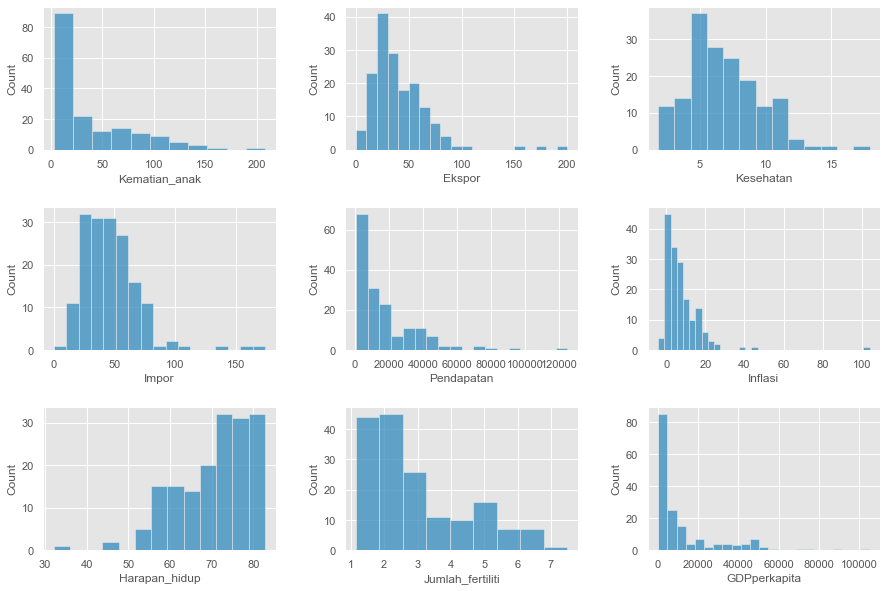

In [688]:
df_uni = df.drop(columns=['Negara'])

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df_uni.columns)), df_uni.columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.histplot(df[columns])

=> Bivariate Analysis


<AxesSubplot:xlabel='GDPperkapita', ylabel='Kesehatan'>

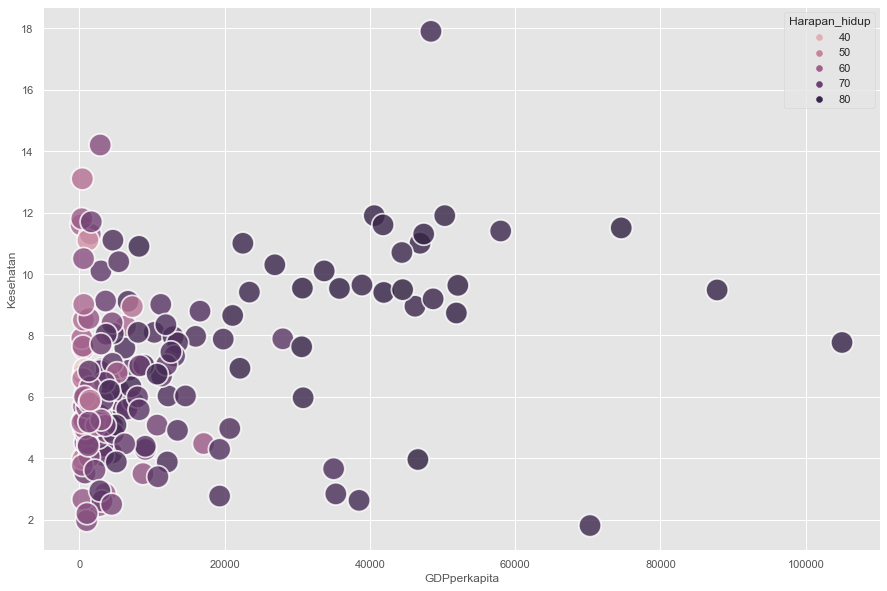

In [689]:
sns.scatterplot(x = 'GDPperkapita', y = 'Kesehatan', hue= 'Harapan_hidup',data=df , s= 500, alpha=0.8)

=> Multivariate Analysis

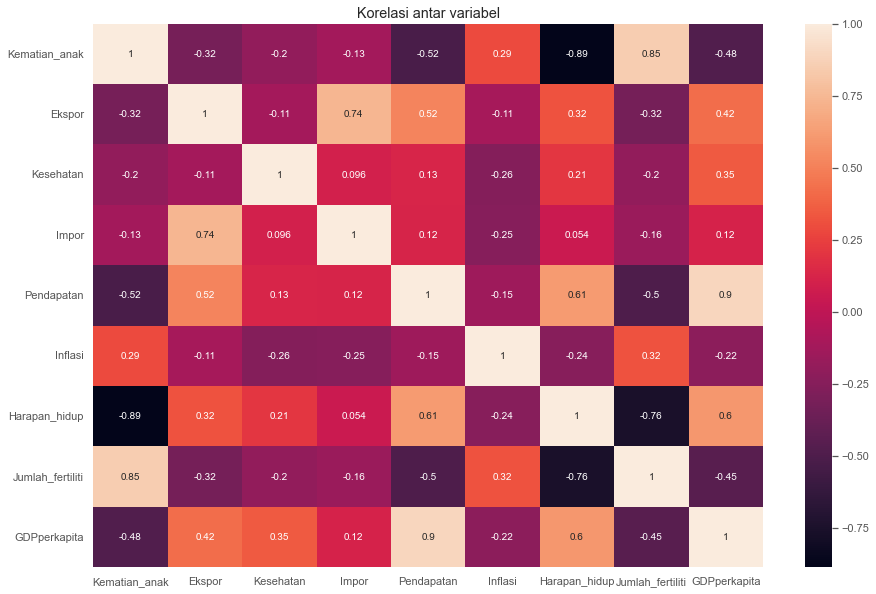

In [690]:
sns.heatmap(df.corr(), annot=True)
plt.title('Korelasi antar variabel')
plt.show()


<h1>Data Preprocessing</h1>

<h2>#Menghapus kolom yang tidak digunakan</h2>

In [691]:
# Drop data yang tidak diperlukan (Tidak memiliki korelasi yang besar terhadap variabel lain (-0.3) - (0,3))
df = df.drop(['Impor','Ekspor','Inflasi'], axis =1 )
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553
1,Albania,16.6,6.55,9930,76.3,1.65,4090
2,Algeria,27.3,4.17,12900,76.5,2.89,4460
3,Angola,119.0,2.85,5900,60.1,6.16,3530
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200
...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,63.0,3.50,2970
163,Venezuela,17.1,4.91,16500,75.4,2.47,13500
164,Vietnam,23.3,6.84,4490,73.1,1.95,1310
165,Yemen,56.3,5.18,4480,67.5,4.67,1310


<h2>#Outliers Treatment</h2>

In [692]:
# Drop upper outliers pada variabel yang memiliki angka kesehatan, harapan hidup, GDPperkapita tinggi karena termasuk negara yang 
# tidak membutuhkan bantuan

def upper_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    x_drop = df[df[x] > upper_bound]
    df.drop(df[df[x]>upper_bound].index,inplace=True)
    print("upper bound:",upper_bound)
    print("outliers:\n",x_drop['Negara'])

def lower_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    x_drop = df[df[x] < lower]
    df.drop(df[df[x]< lower].index,inplace=True)
    print("upper bound:",lower)
    print("outliers:\n",x_drop['Negara'])
    

<h2>Remove outliers</h2>

In [693]:
upper_outliers('GDPperkapita')

upper bound: 33130.0
outliers:
 7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: Negara, dtype: object


In [694]:
upper_outliers('Kesehatan')

upper bound: 12.409999999999997
outliers:
 101    Micronesia, Fed. Sts.
132             Sierra Leone
Name: Negara, dtype: object


In [695]:
upper_outliers('Harapan_hidup')

upper bound: 94.625
outliers:
 Series([], Name: Negara, dtype: object)


In [696]:
lower_outliers('Kematian_anak')

upper bound: -61.50000000000001
outliers:
 Series([], Name: Negara, dtype: object)


<h2>#Data yang sudah siap untuk dilakukan modeling</h2>

In [697]:
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553
1,Albania,16.6,6.55,9930,76.3,1.65,4090
2,Algeria,27.3,4.17,12900,76.5,2.89,4460
3,Angola,119.0,2.85,5900,60.1,6.16,3530
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200
...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,63.0,3.50,2970
163,Venezuela,17.1,4.91,16500,75.4,2.47,13500
164,Vietnam,23.3,6.84,4490,73.1,1.95,1310
165,Yemen,56.3,5.18,4480,67.5,4.67,1310


<h1>Scaling Data</h1>

In [698]:
from sklearn import preprocessing
scaled = preprocessing.StandardScaler().fit_transform(df.drop('Negara', axis=1))
df_scaled = pd.DataFrame(scaled,columns=['Kematian_anak', 'Kesehatan','Pendapatan', 'Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])

<h2>Mencari n_clusters yang paling optimal</h2>

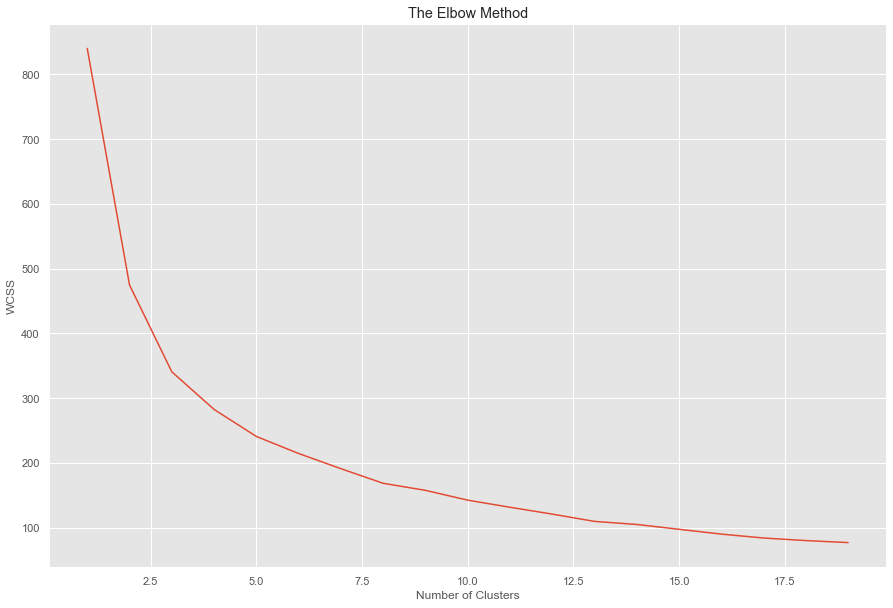

In [699]:
from sklearn.cluster import KMeans
wcss= []
for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Didapat Number of Clusters = 3

In [722]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553,0
1,Albania,16.6,6.55,9930,76.3,1.65,4090,1
2,Algeria,27.3,4.17,12900,76.5,2.89,4460,1
3,Angola,119.0,2.85,5900,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,63.0,3.50,2970,1
163,Venezuela,17.1,4.91,16500,75.4,2.47,13500,2
164,Vietnam,23.3,6.84,4490,73.1,1.95,1310,1
165,Yemen,56.3,5.18,4480,67.5,4.67,1310,0


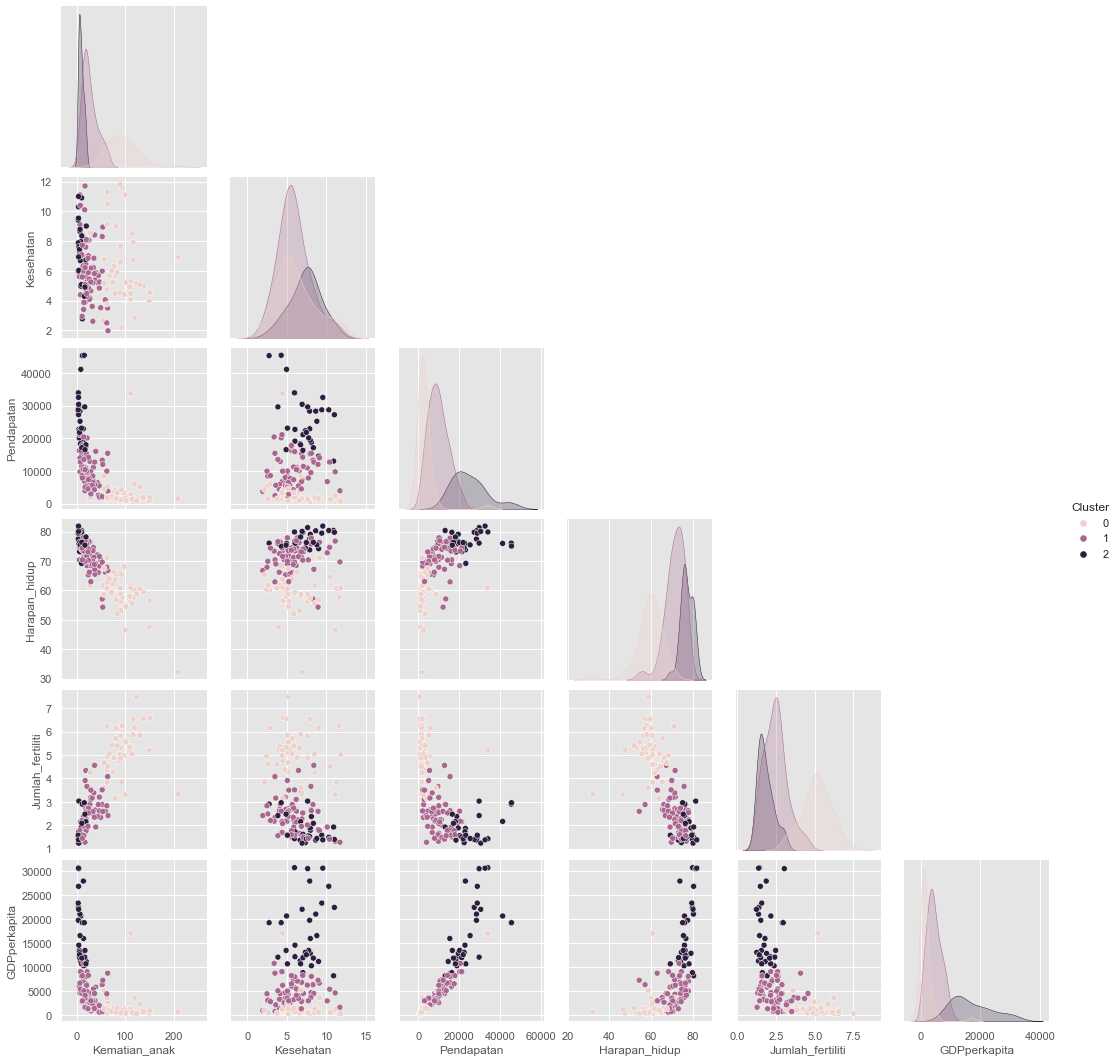

In [723]:
sns.pairplot(df,hue='Cluster',corner=True)

Dari plot tersebut terlihat bahwa cluster 2 adalah cluster yang paling membutuhkan bantuan

In [729]:
df_final=df[df['Cluster']==0]
df_final.sort_values('Pendapatan').head()

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
37,"Congo, Dem. Rep.",116.0,7.91,609,57.5,6.54,334,0
88,Liberia,89.3,11.80,700,60.8,5.02,327,0
26,Burundi,93.6,11.60,764,57.7,6.26,231,0
112,Niger,123.0,5.16,814,58.8,7.49,348,0
31,Central African Republic,149.0,3.98,888,47.5,5.21,446,0
